In [1]:
!nvidia-smi

Fri Mar  1 04:33:02 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 147, done.
remote: Total 147 (delta 0), reused 0 (delta 0), pack-reused 147
Receiving objects: 100% (147/147), 607.53 KiB | 6.68 MiB/s, done.
Resolving deltas: 100% (58/58), done.
/content/yolov9
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.9 MB/s eta 0:00:00


In [4]:
!pip install -q roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.3 MB/s eta 0:00:00


## Imports

In [5]:
import roboflow

from IPython.display import Image

## Download model weights

In [6]:
!mkdir -p {HOME}/weights

In [7]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt

In [8]:
!ls -la {HOME}/weights

total 151048
drwxr-xr-x 2 root root      4096 Mar  1 04:34 .
drwxr-xr-x 1 root root      4096 Mar  1 04:34 ..
-rw-r--r-- 1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt


## Download example data

In [9]:
!mkdir -p {HOME}/data

In [10]:
SOURCE_IMAGE_PATH = "/content/car.jpg"

## Detection with pre-trained COCO model

### gelan-c

In [14]:
!python detect.py --weights {HOME}/weights/gelan-c.pt --conf 0.1 --source /content/car.jpg --device 0

detect: weights=['/content/weights/gelan-c.pt'], source=/content/car.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 467 layers, 25472640 parameters, 0 gradients, 102.8 GFLOPs
image 1/1 /content/car.jpg: 448x640 17 cars, 1 bus, 2 trucks, 144.8ms
Speed: 0.5ms pre-process, 144.8ms inference, 578.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


In [21]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.7/78.2 GB disk)


In [23]:
from PIL import Image
from ultralytics import YOLO
import ultralytics
import numpy as np
from cv2 import imread
from matplotlib import pyplot as plt
from matplotlib.image import imread

In [24]:
# Load the predicted image
predicted_img_path = '/content/yolov9/runs/detect/exp3/car.jpg'
predicted_img = imread(predicted_img_path)

In [28]:
%cd {HOME}/yolov9


from roboflow import Roboflow
rf = Roboflow(api_key="Owb7wL0INQDuAuAz9gth")
project = rf.workspace("nicolai-hoirup-nielsen").project("cup-detection-v2")
dataset = project.version(3).download("yolov9")



/content/yolov9
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Cup-Detection-v2-3 in yolov9:: 100%|██████████| 730/730 [00:00<00:00, 8882.04it/s]


## Train Custom Model

In [29]:
%cd {HOME}/yolov9

!python train.py \
--batch 8 --epochs 10 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-03-01 04:51:11.023414: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-01 04:51:11.023466: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-01 04:51:11.024795: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=/content/weights/gelan-c.pt, cfg=models/detect/gelan-c.yaml, data=/content/yolov9/Cup-Detection-v2-3/data.yaml, hyp=hyp.scratch-high.yaml, epochs=10, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_

## Examine Training Results

In [30]:
!ls {HOME}/yolov9/runs/train/exp2/

confusion_matrix.png				    P_curve.png       train_batch2.jpg
events.out.tfevents.1709268672.e67a99ddcb67.6057.0  PR_curve.png      val_batch0_labels.jpg
F1_curve.png					    R_curve.png       val_batch0_pred.jpg
hyp.yaml					    results.csv       val_batch1_labels.jpg
labels_correlogram.jpg				    results.png       val_batch1_pred.jpg
labels.jpg					    train_batch0.jpg  weights
opt.yaml					    train_batch1.jpg


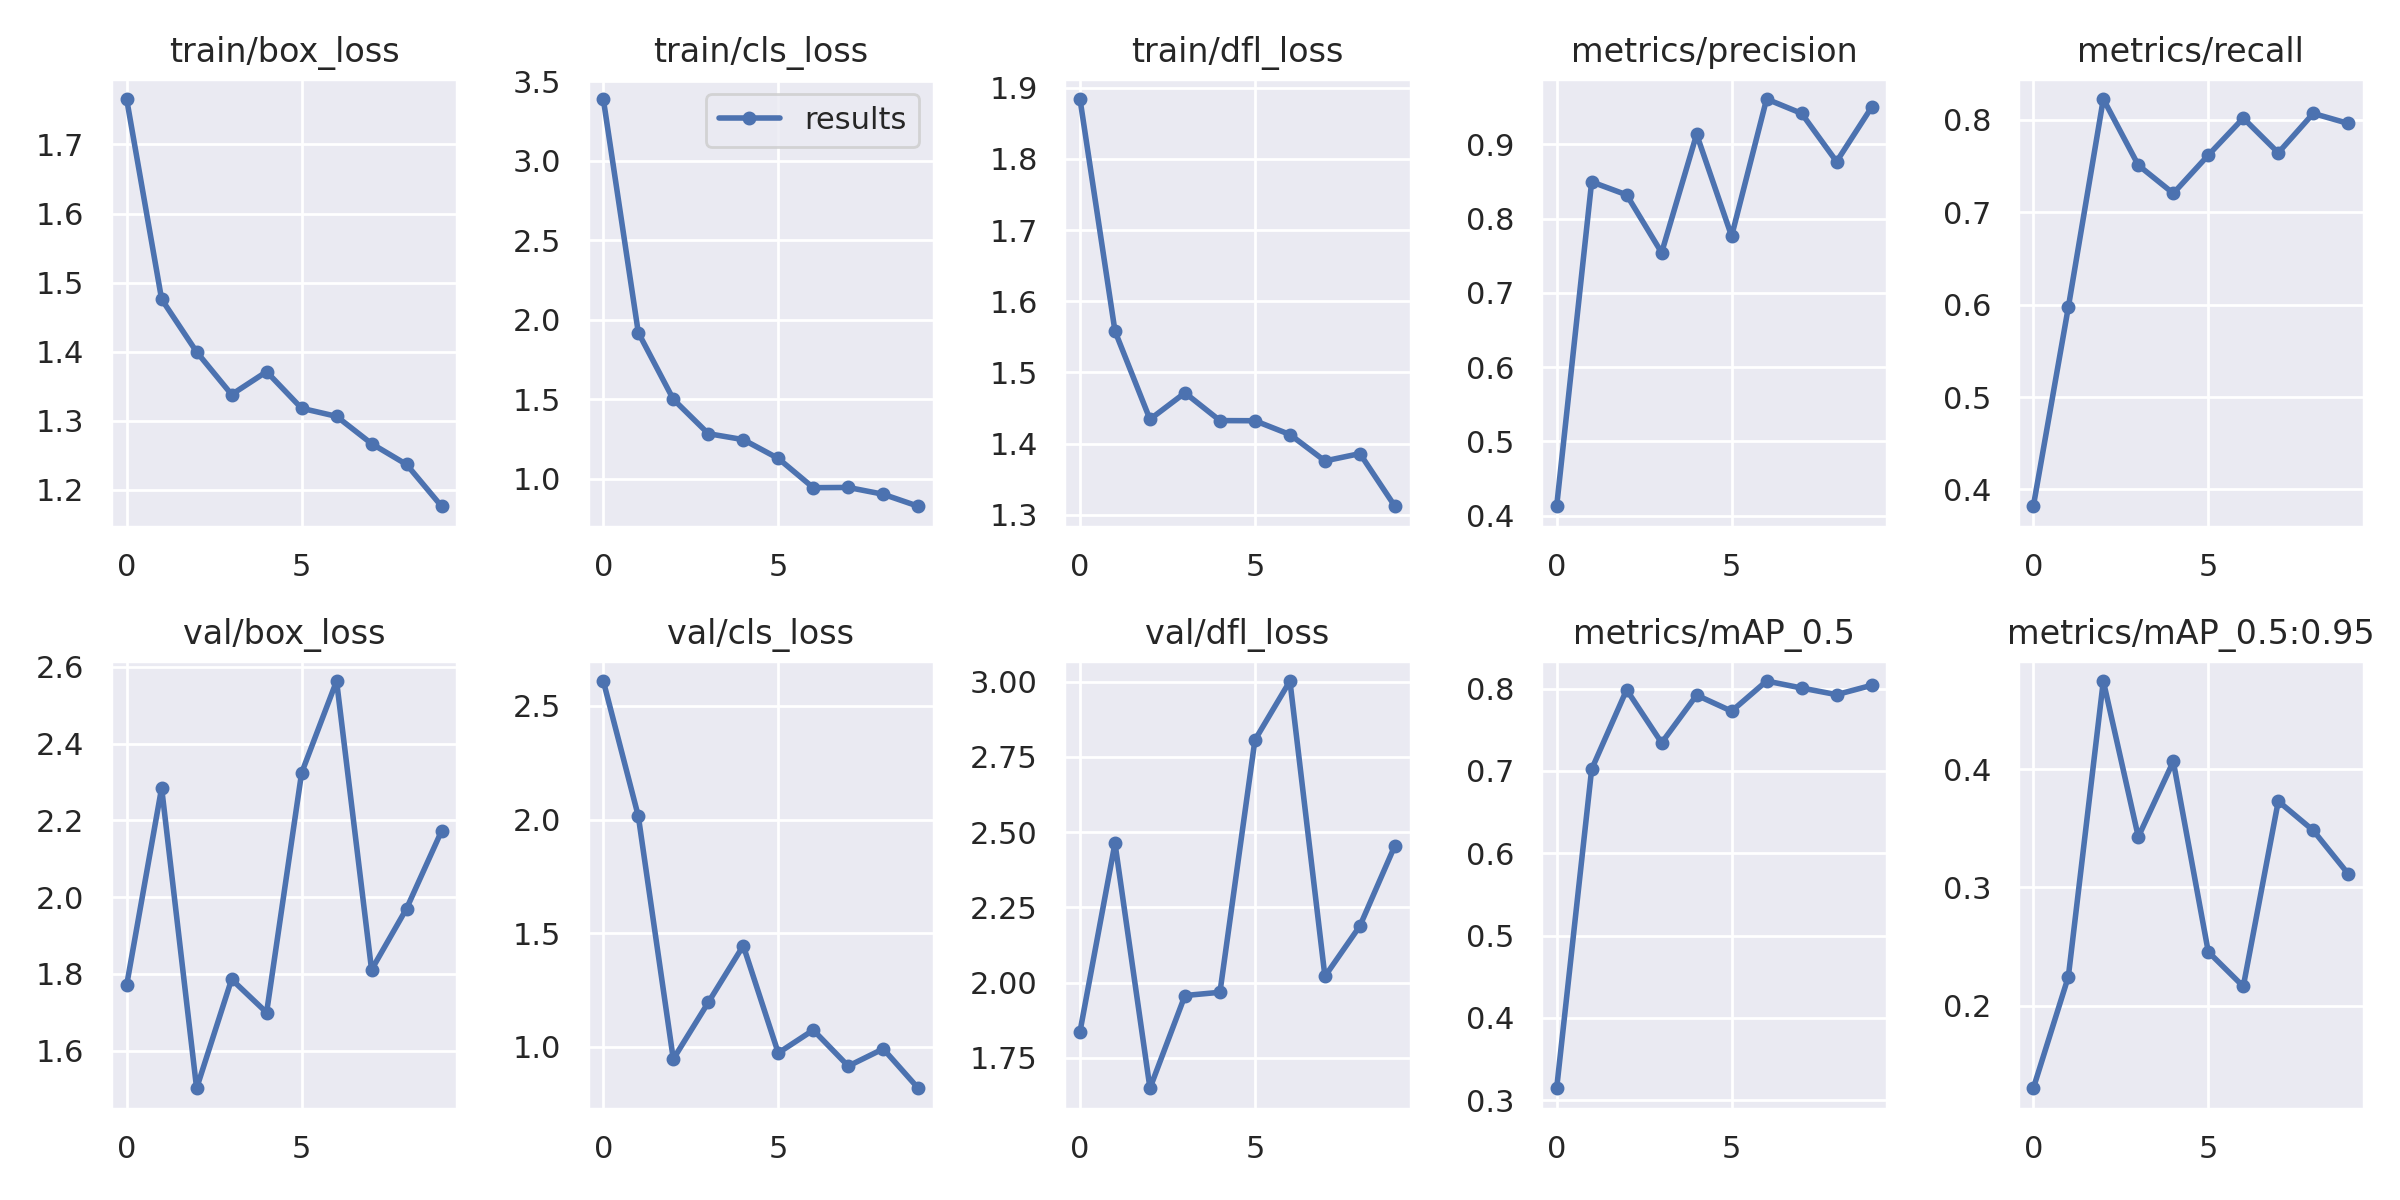

In [36]:
from IPython.display import Image
Image(filename=f"{HOME}/yolov9/runs/train/exp2/results.png", width=1000)


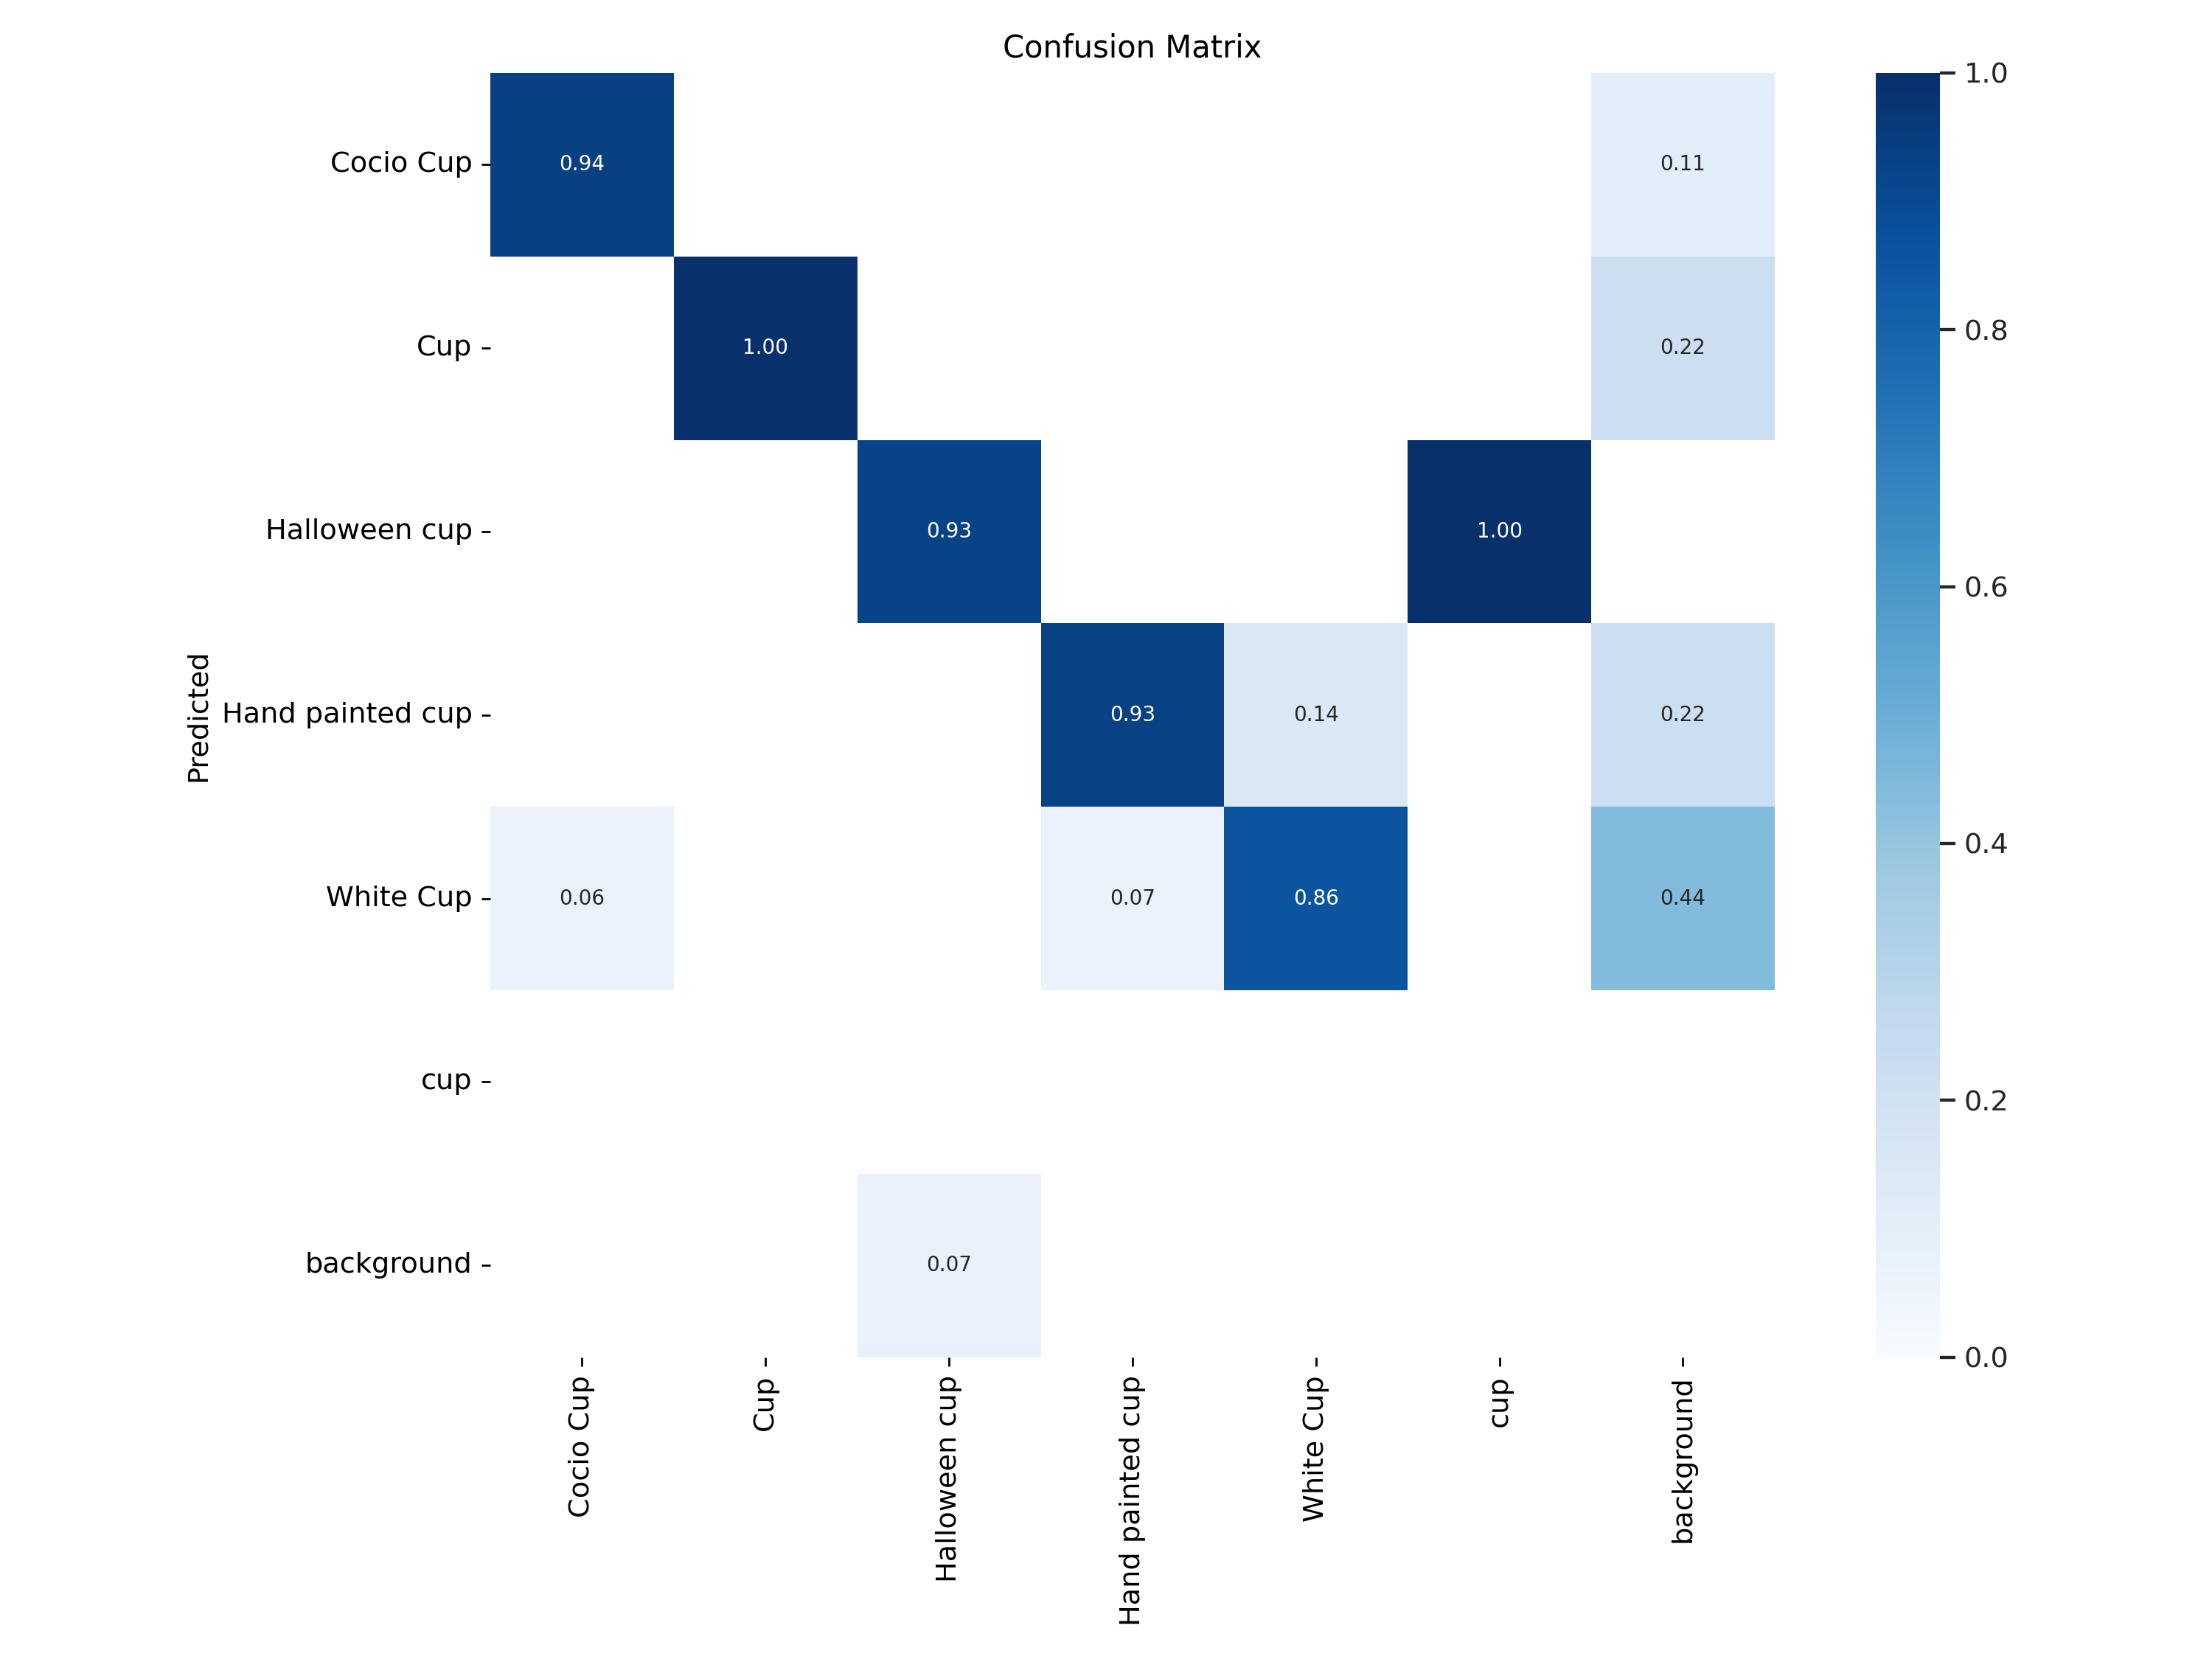

In [37]:
Image(filename=f"{HOME}/yolov9/runs/train/exp2/confusion_matrix.png", width=1000)

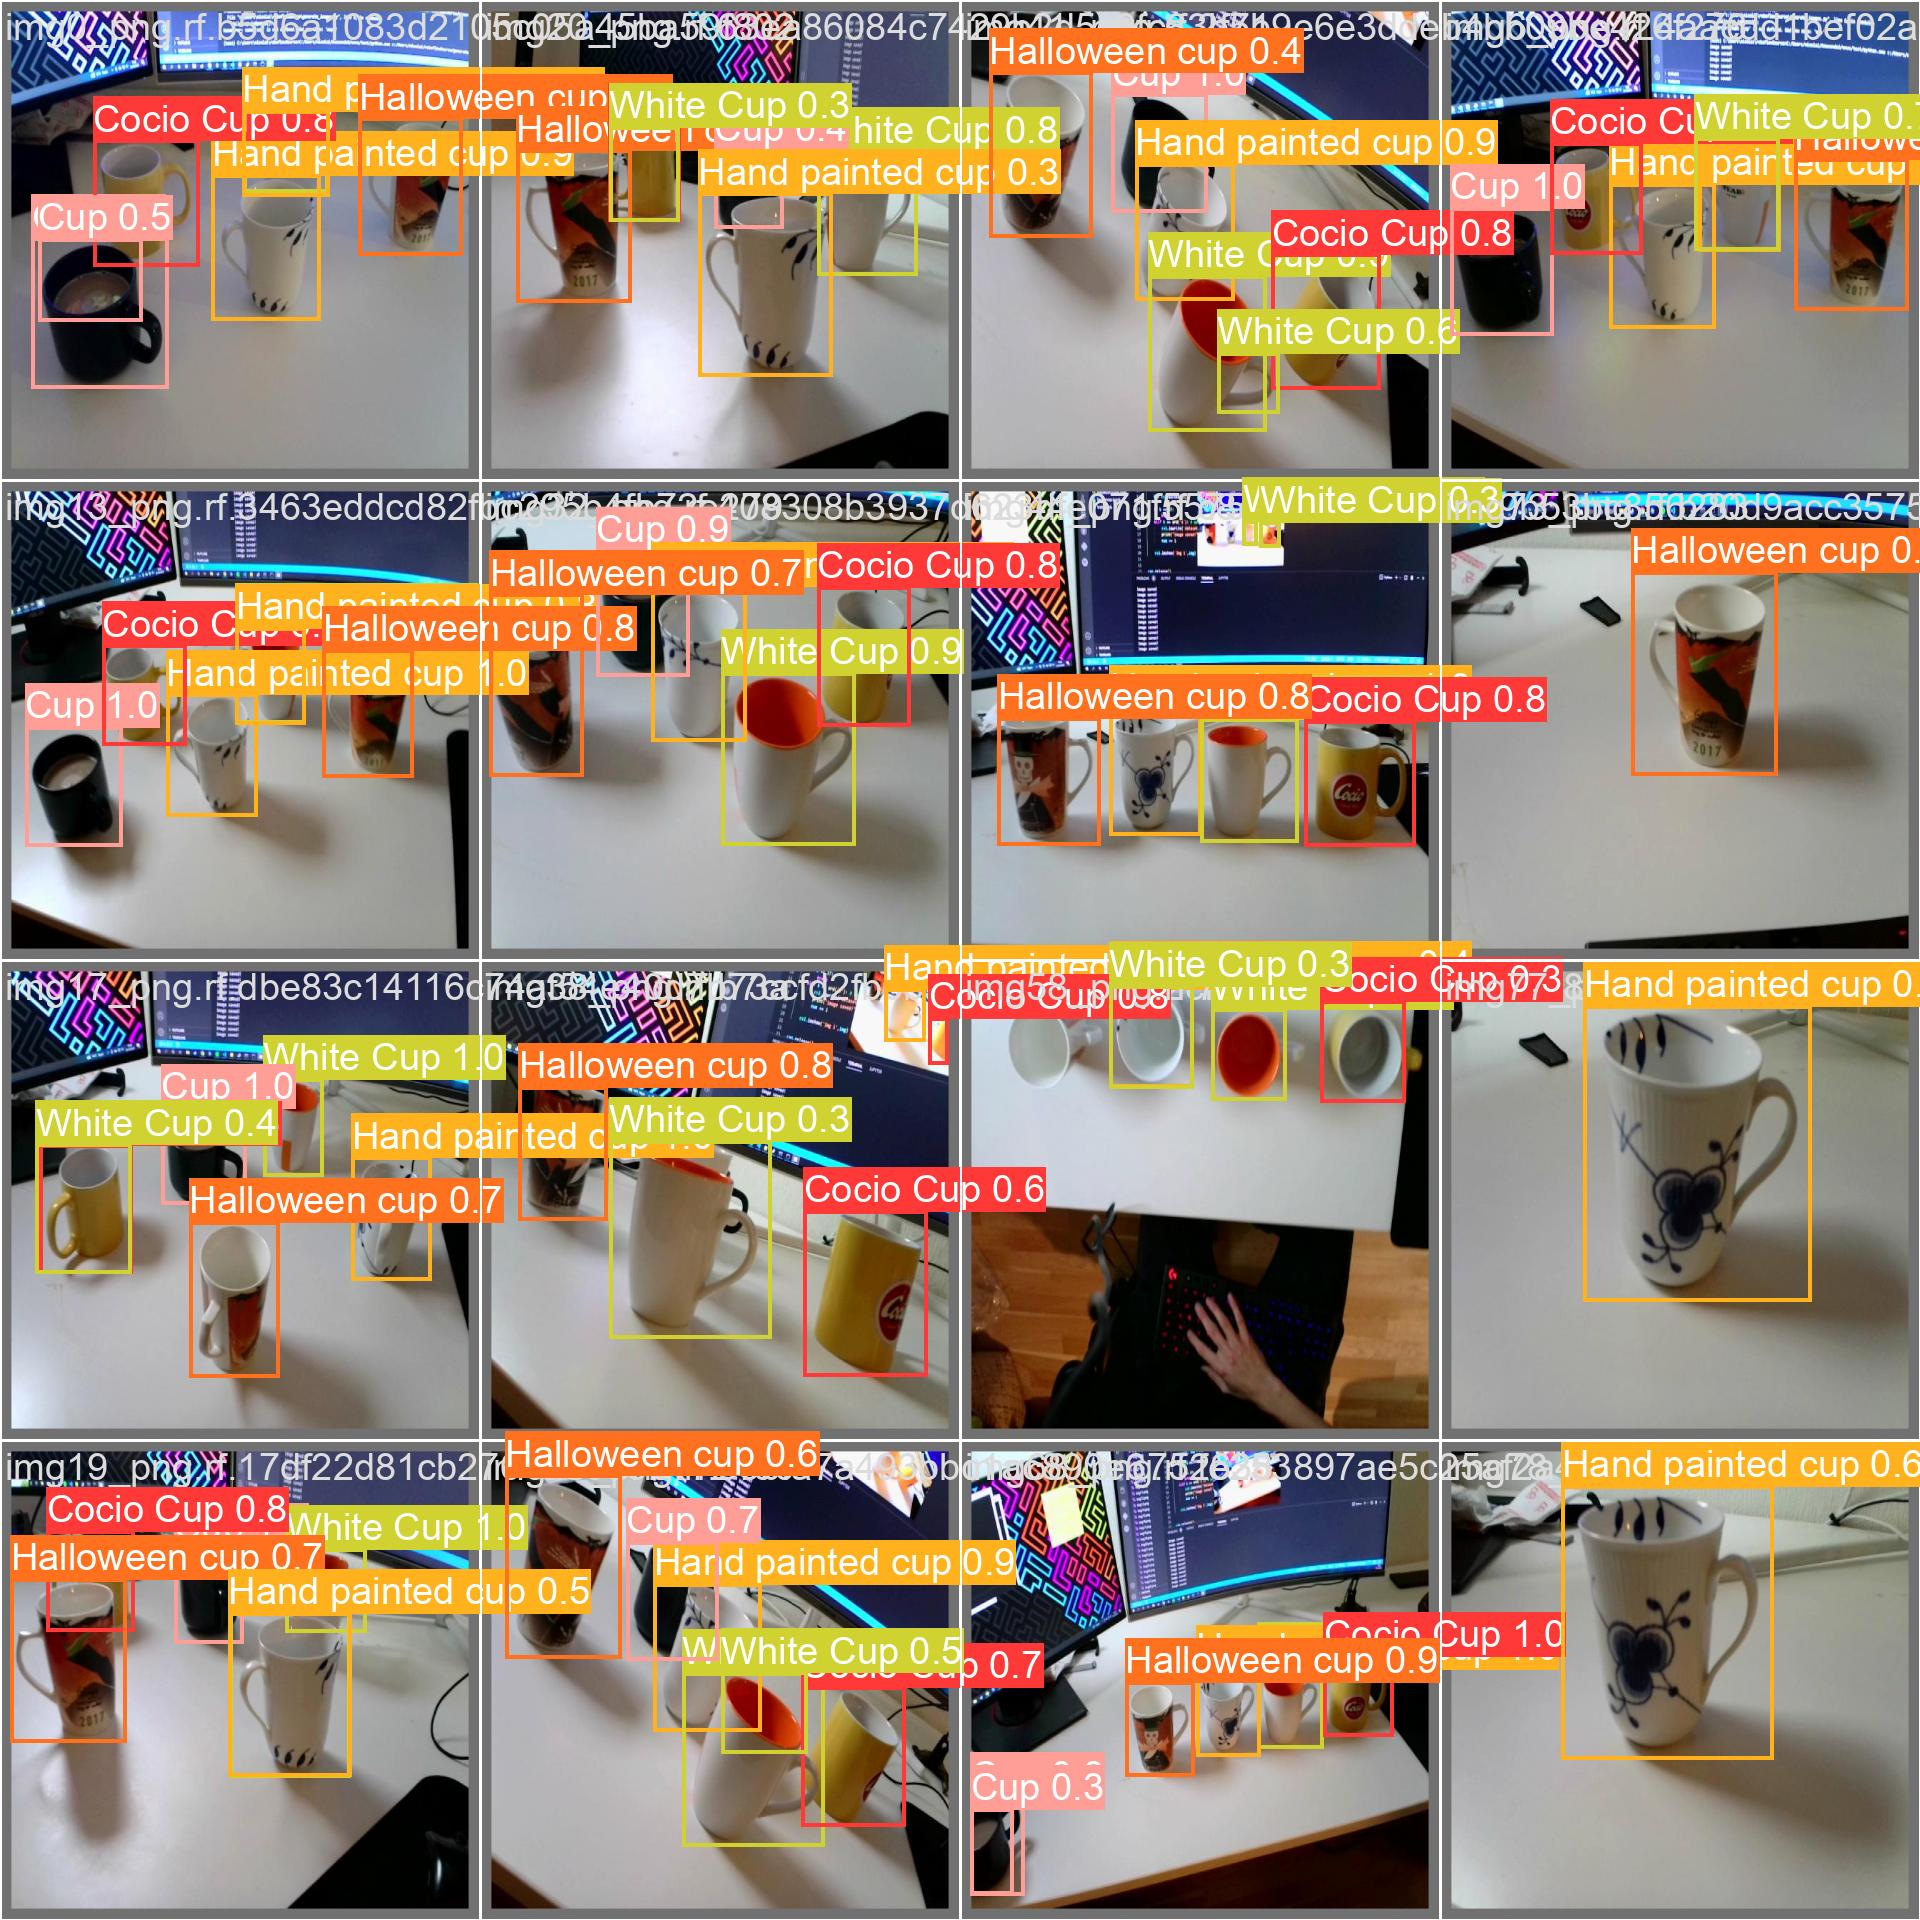

In [38]:
Image(filename=f"{HOME}/yolov9/runs/train/exp2/val_batch0_pred.jpg", width=1000)

## Validate Custom Model

In [40]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 8 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp2/weights/best.pt

/content/yolov9
val: data=/content/yolov9/Cup-Detection-v2-3/data.yaml, weights=['/content/yolov9/runs/train/exp2/weights/best.pt'], batch_size=8, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25415586 parameters, 0 gradients, 102.5 GFLOPs
val: Scanning /content/yolov9/Cup-Detection-v2-3/valid/labels.cache... 19 images, 0 backgrounds, 0 corrupt: 100% 19/19 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 3/3 [00:03<00:00,  1.03s/it]
                   all         19         71      0.832      0.822      0.799      0.475
             Cocio Cup         19         16   

## Inference with Custom Model

In [42]:
!python detect.py \
--img 640 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp2/weights/best.pt \
--source {dataset.location}/valid/images

detect: weights=['/content/yolov9/runs/train/exp2/weights/best.pt'], source=/content/yolov9/Cup-Detection-v2-3/valid/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25415586 parameters, 0 gradients, 102.5 GFLOPs
image 1/19 /content/yolov9/Cup-Detection-v2-3/valid/images/img0_png.rf.b5d6a1083d2105c05a45ba59f8022d20.jpg: 640x640 1 Cocio Cup, 2 Cups, 1 Halloween cup, 3 Hand painted cups, 1 White Cup, 51.2ms
image 2/19 /content/yolov9/Cup-Detection-v2-3/valid/images/img13_png.rf.3463eddcd82fbc295b4fb72e2795790e.jpg: 6

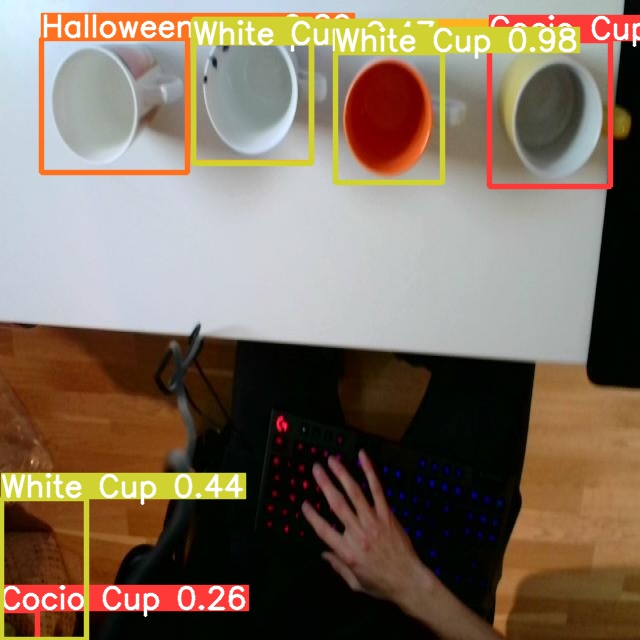

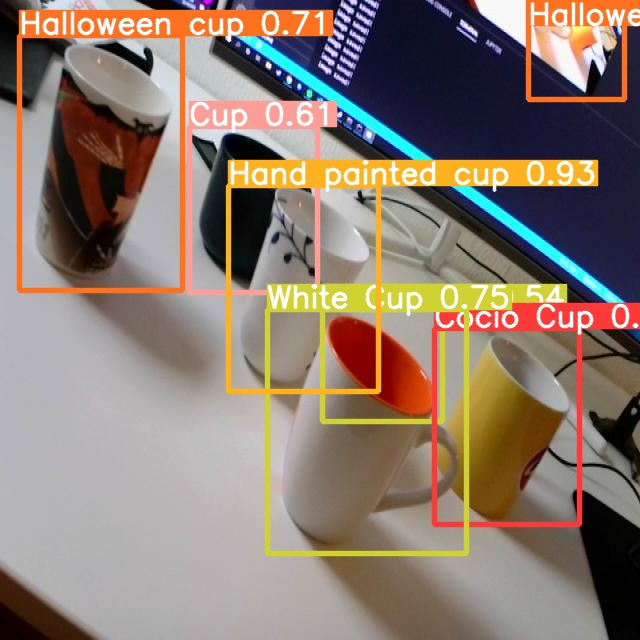

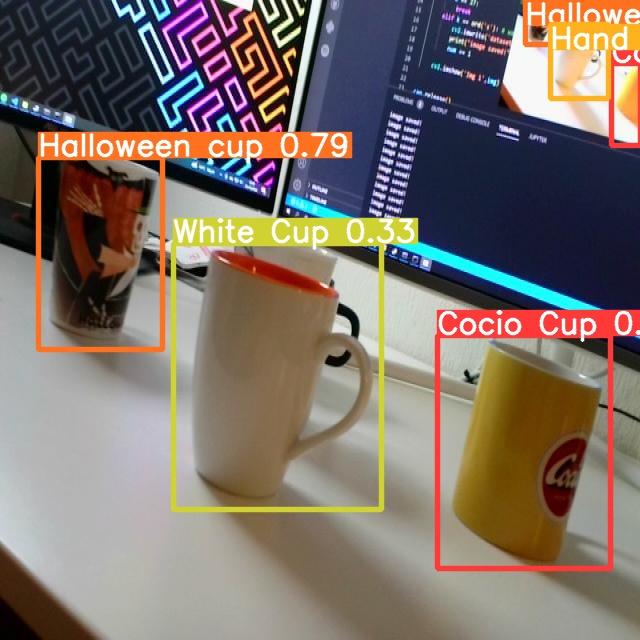

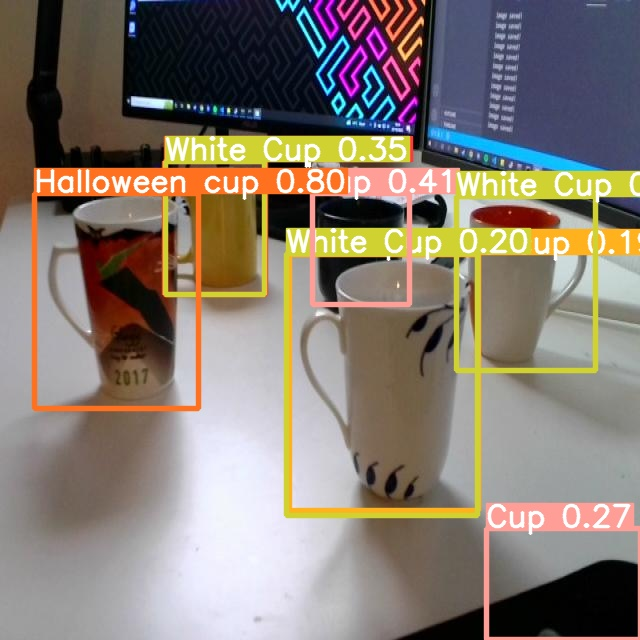

In [47]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp5/*.jpg')[:4]:
      display(Image(filename=image_path, width=600))
      print("\n")